# Exercício 5

In [1]:
import numpy as np
import math  
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [3]:
N = 1000

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

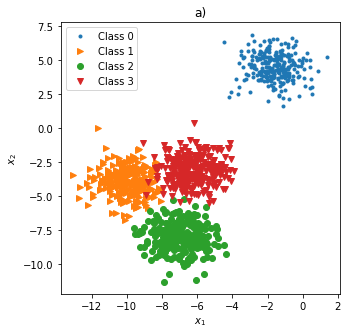

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)
idx3 = np.argwhere(y == 3)

fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], '>', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'o', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'v', label='Class 3')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('a)')
plt.legend()
plt.show()

## Método do Cotovelo

In [5]:
sum_of_squares = calculate_wcss(X)
    
# calculating the optimal number of clusters
n_clusters = optimal_number_of_clusters(sum_of_squares)

print(n_clusters)

4


In [6]:
km = KMeans(n_clusters=n_clusters)

km.fit(X)

KMeans(n_clusters=4)

In [7]:
centroid1 = []
centroid2 = []

print('c) valores ótimos para centroids')

for i in range(0,n_clusters):
    centroid1.append(km.cluster_centers_[i][0])
    centroid2.append(km.cluster_centers_[i][1])
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

c) valores ótimos para centroids
Centroid 0: (-1.61, 4.46)
Centroid 1: (-6.21, -3.15)
Centroid 2: (-9.90, -3.93)
Centroid 3: (-6.98, -8.10)


In [8]:
y = km.labels_

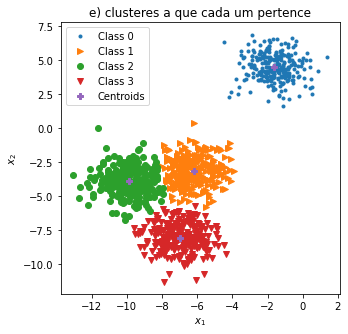

In [9]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)
idx3 = np.argwhere(y == 3)

fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], '>', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'o', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'v', label='Class 3')
plt.plot(centroid1,centroid2, 'P', label='Centroids')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('e) clusteres a que cada um pertence')
plt.legend()
plt.show()

## Método da Silhueta

In [10]:
sil = []
kmax = 21
max_score = -2
n_clusters = -1

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 21):
    km2 = KMeans(n_clusters = k).fit(X)
    labels = km2.labels_
    score = silhouette_score(X, labels, metric = 'euclidean')
    if(max_score<score):
        max_score=score
        n_clusters = k
        
print(max_score)
print(n_clusters)

0.7047494651336347
2


In [11]:
km2 = KMeans(n_clusters=n_clusters)

km2.fit(X)

KMeans(n_clusters=2)

In [12]:
centroid1 = []
centroid2 = []

print('c) valores ótimos para centroids')

for i in range(0,n_clusters):
    centroid1.append(km2.cluster_centers_[i][0])
    centroid2.append(km2.cluster_centers_[i][1])
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km2.cluster_centers_[i][0],km2.cluster_centers_[i][1]))

c) valores ótimos para centroids
Centroid 0: (-7.74, -5.05)
Centroid 1: (-1.61, 4.46)


In [13]:
y = km2.labels_

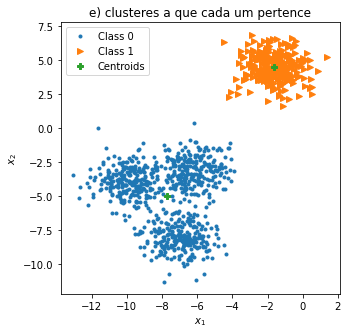

In [14]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], '>', label='Class 1')
plt.plot(centroid1,centroid2, 'P', label='Centroids')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('e) clusteres a que cada um pertence')
plt.legend()
plt.show()